# Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sentiment_df = pd.read_csv('sentiment_scores_1653061928_1653044298.csv').dropna(subset=['comment_body'])

In [3]:
pd.to_datetime(sentiment_df.comment_time[0], unit='s')

Timestamp('2022-05-12 16:42:50')

In [4]:
sentiment_df.dtypes

post_id            object
post_time          object
post_title         object
comment_id         object
comment_time      float64
comment_body       object
comment_author     object
neg               float64
neu               float64
pos               float64
compound          float64
dtype: object

In [5]:
sentiment_df.index = pd.to_datetime(sentiment_df.pop('comment_time'), unit = 's')
sentiment_df.sort_index(inplace=True)

In [6]:
sentiment_df = sentiment_df["2019-01-01":]
sentiment_df.head()

,post_id,post_time,post_title,comment_id,comment_body,comment_author,neg,neu,pos,compound
comment_time,,,,,,,,,,
2019-01-01 18:55:30,aap0nl,2018-12-29 21:06:25,Viktor Orbn calls for antimigrant vote across ...,ed0yym3,classic german troll,glodymclodsen,0.000,1.000,0.000,0.0000
2019-01-03 11:52:35,ac2gtg,2019-01-03 05:32:35,Two held over Channel migrant crossings,ed570j1,Hi thank you for your contribution but this su...,BkkGrl,0.065,0.729,0.206,0.7003
2019-01-03 14:20:52,ac27lg,2019-01-03 05:01:29,Greek citizenship awarded to migrants who save...,ed5fmlf,deleted,None,0.000,1.000,0.000,0.0000
2019-01-03 23:23:32,ac27lg,2019-01-03 05:01:29,Greek citizenship awarded to migrants who save...,ed6okqd,Username checks out,petcockabibliophobia,0.000,1.000,0.000,0.0000
2019-01-04 11:03:11,acgdtz,2019-01-04 08:59:00,Britain will attract the fleet to the protecti...,ed7ukvz,And yet the have the same problems as in medit...,x0y1,0.044,0.542,0.414,0.9661


In [7]:
sentiment_df.groupby('comment_author').count().mean()

post_id         5.463615
post_time       5.463615
post_title      5.463615
comment_id      5.463615
comment_body    5.463615
neg             5.463615
neu             5.463615
pos             5.463615
compound        5.463615
dtype: float64

In [8]:
sentiment_df.nunique()

post_id            1394
post_time          1394
post_title         1320
comment_id        43321
comment_body      38774
comment_author     7929
neg                 781
neu                 890
pos                 795
compound           3801
dtype: int64

In [9]:
print(f'Comments go from {sentiment_df.post_time.min()} to {sentiment_df.post_time.max()}')

Comments go from 2018-10-16 10:09:47 to 2022-05-12 14:55:42


In [10]:
sentiment_df.index.max()

Timestamp('2022-05-12 16:42:50')

### Separate data according to end of crisis

In [11]:
before_df = sentiment_df["2019-01-01":"2021-12-31"]
after_df = sentiment_df["2022-01-31":]

In [12]:
author_all_df = sentiment_df.groupby('comment_author', as_index= True)[['neg', 'neu', 'pos']].mean()
author_before_df = before_df.groupby('comment_author', as_index= True)[['neg', 'neu', 'pos']].mean()
author_after_df = after_df.groupby('comment_author', as_index= True)[['neg', 'neu', 'pos']].mean()

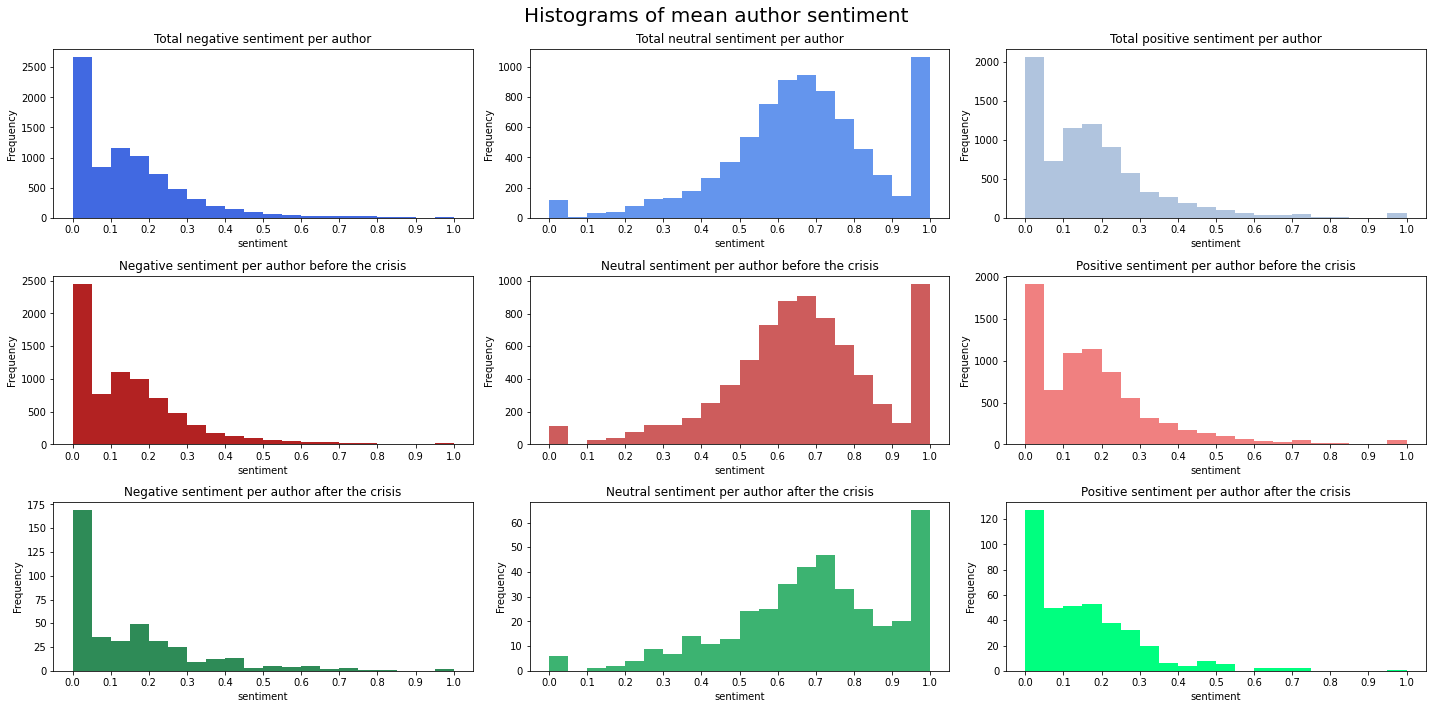

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(20,10))
fig.suptitle('Histograms of mean author sentiment', size=20)
ax = author_all_df['neg'].plot(kind='hist', bins=20, title = "Total negative sentiment per author", ax= axs[0,0], color='royalblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_all_df['neu'].plot(kind='hist', bins=20, title = "Total neutral sentiment per author", ax= axs[0,1], color='cornflowerblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_all_df['pos'].plot(kind='hist', bins=20, title = "Total positive sentiment per author", ax= axs[0,2], color='lightsteelblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_before_df['neg'].plot(kind='hist', bins=20, title = "Negative sentiment per author before the crisis", ax= axs[1,0], color='firebrick')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_before_df['neu'].plot(kind='hist', bins=20, title = "Neutral sentiment per author before the crisis", ax= axs[1,1], color='indianred')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_before_df['pos'].plot(kind='hist', bins=20, title = "Positive sentiment per author before the crisis", ax= axs[1,2], color='lightcoral')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_after_df['neg'].plot(kind='hist', bins=20, title = "Negative sentiment per author after the crisis", ax= axs[2,0], color='seagreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_after_df['neu'].plot(kind='hist', bins=20, title = "Neutral sentiment per author after the crisis", ax= axs[2,1], color='mediumseagreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = author_after_df['pos'].plot(kind='hist', bins=20, title = "Positive sentiment per author after the crisis", ax= axs[2,2], color='springgreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
plt.tight_layout()

## Mean sentiment per day

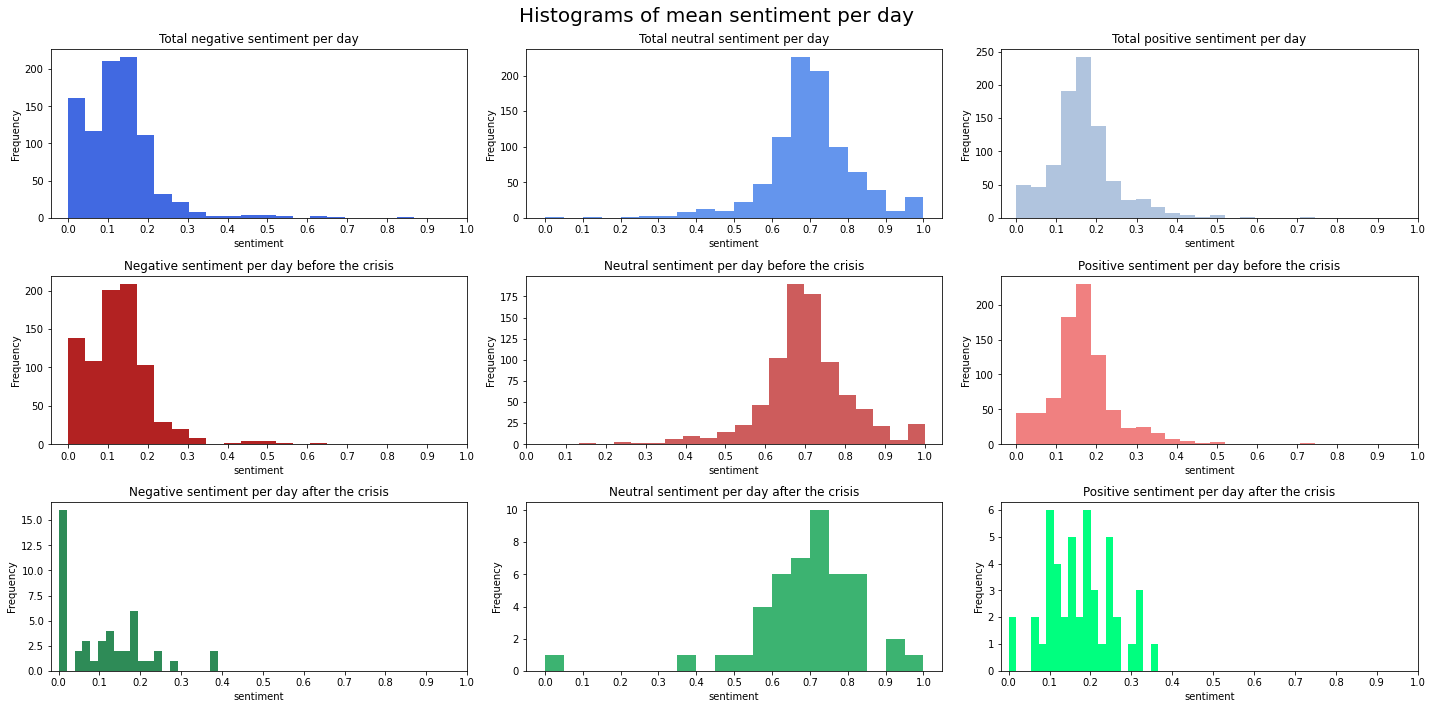

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(20,10))
fig.suptitle('Histograms of mean sentiment per day', size=20)
ax = sentiment_df.groupby(sentiment_df.index.date).neg.mean().plot(kind='hist', bins=20, title = "Total negative sentiment per day", ax= axs[0,0], color='royalblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = sentiment_df.groupby(sentiment_df.index.date).neu.mean().plot(kind='hist', bins=20, title = "Total neutral sentiment per day", ax= axs[0,1], color='cornflowerblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = sentiment_df.groupby(sentiment_df.index.date).pos.mean().plot(kind='hist', bins=20, title = "Total positive sentiment per day", ax= axs[0,2], color='lightsteelblue')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = before_df.groupby(before_df.index.date).neg.mean().plot(kind='hist', bins=20, title = "Negative sentiment per day before the crisis", ax= axs[1,0], color='firebrick')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = before_df.groupby(before_df.index.date).neu.mean().plot(kind='hist', bins=20, title = "Neutral sentiment per day before the crisis", ax= axs[1,1], color='indianred')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = before_df.groupby(before_df.index.date).pos.mean().plot(kind='hist', bins=20, title = "Positive sentiment per day before the crisis", ax= axs[1,2], color='lightcoral')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = after_df.groupby(after_df.index.date).neg.mean().plot(kind='hist', bins=20, title = "Negative sentiment per day after the crisis", ax= axs[2,0], color='seagreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = after_df.groupby(after_df.index.date).neu.mean().plot(kind='hist', bins=20, title = "Neutral sentiment per day after the crisis", ax= axs[2,1], color='mediumseagreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
ax = after_df.groupby(after_df.index.date).pos.mean().plot(kind='hist', bins=20, title = "Positive sentiment per day after the crisis", ax= axs[2,2], color='springgreen')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('sentiment')
plt.tight_layout()

Text(0.5, 0, 'sentiment')

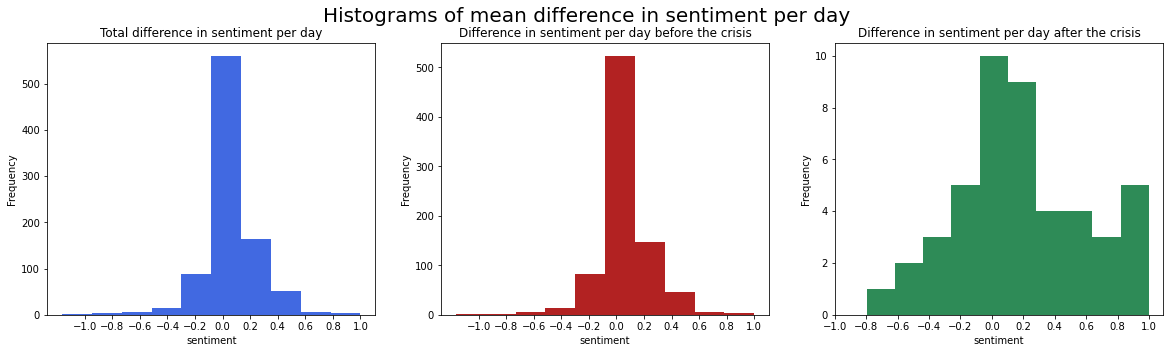

In [23]:
#Mean sentiment difference
## TODO: I F'ed it up
## TODO: Scale it to percentages
fig, axs = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Histograms of mean difference in sentiment per day', size=20)
data = (sentiment_df.groupby(sentiment_df.index.date).pos.mean() - sentiment_df.groupby(sentiment_df.index.date).neg.mean())
maxi = data.max()
ax = (data/maxi).plot(kind='hist', title = "Total difference in sentiment per day", ax= axs[0], color='royalblue')
ax.xaxis.set_ticks(np.arange(-1.0, 1.1, 0.2))
ax.set_xlabel('sentiment')
data = (before_df.groupby(before_df.index.date).pos.mean() - before_df.groupby(before_df.index.date).neg.mean())
maxi = data.max()
ax = (data/maxi).plot(kind='hist', title = "Difference in sentiment per day before the crisis", ax= axs[1], color='firebrick')
ax.xaxis.set_ticks(np.arange(-1.0, 1.1, 0.2))
ax.set_xlabel('sentiment')
data = (after_df.groupby(after_df.index.date).pos.mean() - after_df.groupby(after_df.index.date).neg.mean())
maxi = data.max()
ax = (data/maxi).plot(kind='hist', title = "Difference in sentiment per day after the crisis", ax= axs[2], color='seagreen')
ax.xaxis.set_ticks(np.arange(-1.0, 1.1, 0.2))
ax.set_xlabel('sentiment')

# Mean sentiment per post

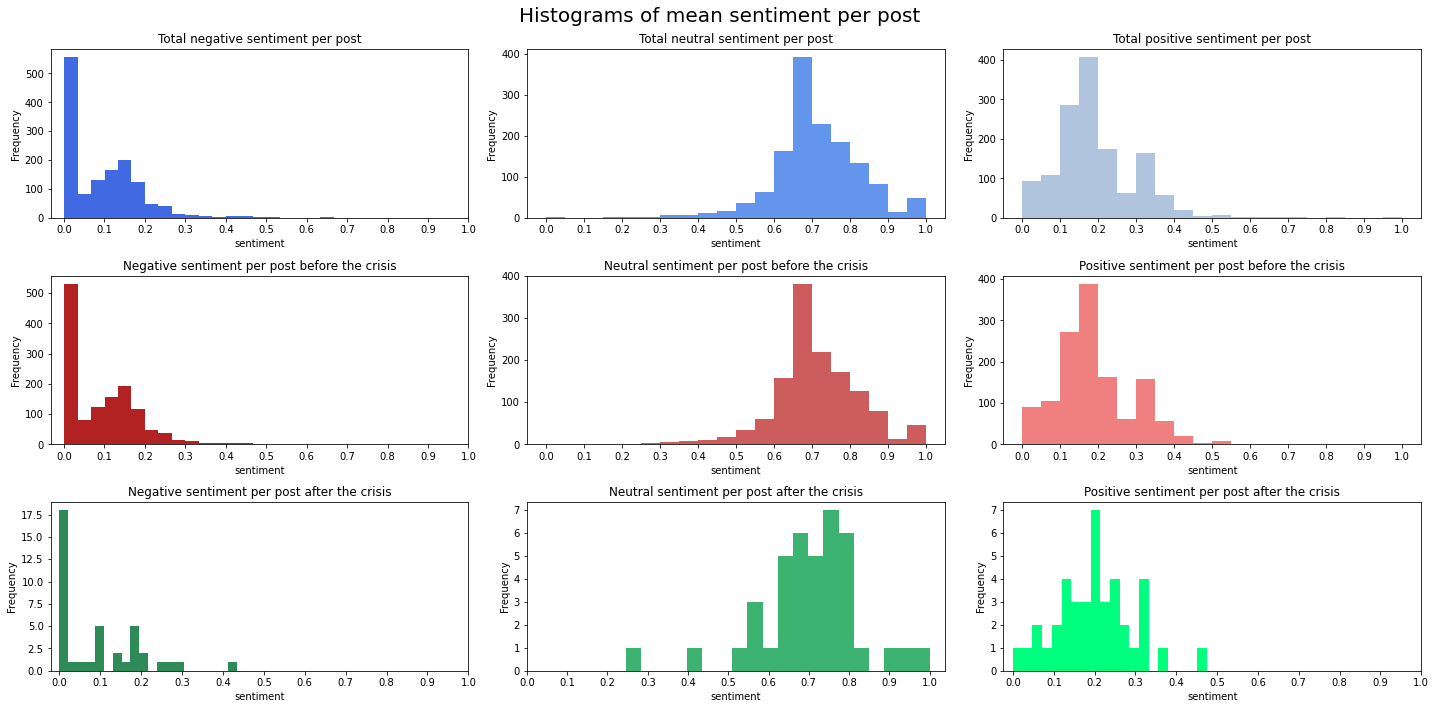

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(20,10))
fig.suptitle('Histograms of mean sentiment per post', size=20)
ax = sentiment_df.groupby('post_id').neg.mean().plot(kind='hist', bins=20, title = "Total negative sentiment per post", ax= axs[0,0], color='royalblue')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = sentiment_df.groupby('post_id').neu.mean().plot(kind='hist', bins=20, title = "Total neutral sentiment per post", ax= axs[0,1], color='cornflowerblue')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = sentiment_df.groupby('post_id').pos.mean().plot(kind='hist', bins=20, title = "Total positive sentiment per post", ax= axs[0,2], color='lightsteelblue')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = before_df.groupby('post_id').neg.mean().plot(kind='hist', bins=20, title = "Negative sentiment per post before the crisis", ax= axs[1,0], color='firebrick')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = before_df.groupby('post_id').neu.mean().plot(kind='hist', bins=20, title = "Neutral sentiment per post before the crisis", ax= axs[1,1], color='indianred')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = before_df.groupby('post_id').pos.mean().plot(kind='hist', bins=20, title = "Positive sentiment per post before the crisis", ax= axs[1,2], color='lightcoral')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = after_df.groupby('post_id').neg.mean().plot(kind='hist', bins=20, title = "Negative sentiment per post after the crisis", ax= axs[2,0], color='seagreen')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = after_df.groupby('post_id').neu.mean().plot(kind='hist', bins=20, title = "Neutral sentiment per post after the crisis", ax= axs[2,1], color='mediumseagreen')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
ax = after_df.groupby('post_id').pos.mean().plot(kind='hist', bins=20, title = "Positive sentiment per post after the crisis", ax= axs[2,2], color='springgreen')
ax.set_xlabel('sentiment')
ax.xaxis.set_ticks(np.arange(0.0, 1.1, 0.1))
plt.tight_layout()

## Sentiment plot over time

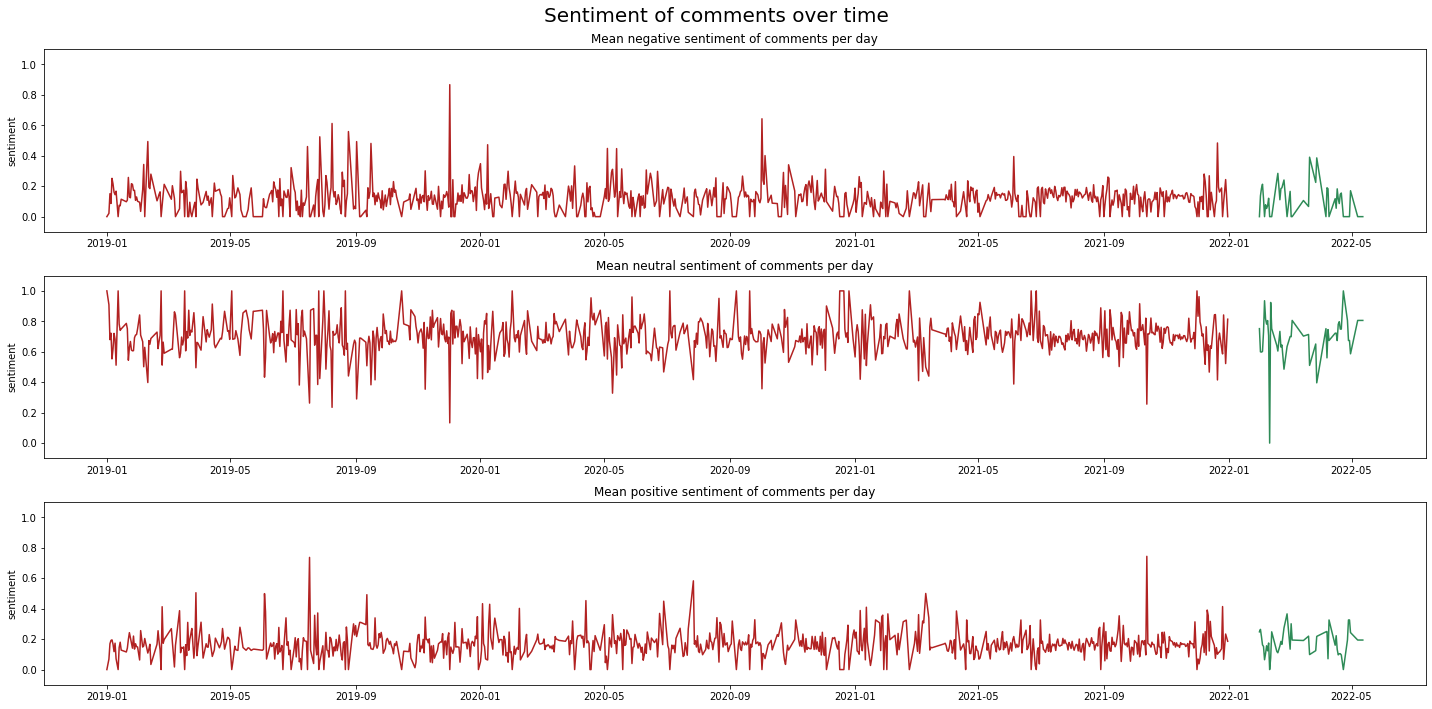

In [17]:
fig, ax = plt.subplots(3,1, figsize=(20,10))
plt.suptitle('Sentiment of comments over time', fontsize=20)
axes = before_df.groupby(before_df.index.date).neg.mean().plot(ax=ax[0], title="Mean negative sentiment of comments per day", color='firebrick', ylim=(-0.1,1.1))
axes.yaxis.set_ticks(np.arange(0.0, 1.1, 0.2))
axes.set_ylabel('sentiment')
axes = before_df.groupby(before_df.index.date).neu.mean().plot(ax=ax[1], title="Mean neutral sentiment of comments per day", color='firebrick', ylim=(-0.1,1.1))
axes.yaxis.set_ticks(np.arange(0.0, 1.1, 0.2))
axes.set_ylabel('sentiment')
axes = before_df.groupby(before_df.index.date).pos.mean().plot(ax=ax[2], title="Mean positive sentiment of comments per day", color='firebrick', ylim=(-0.1,1.1))
axes.yaxis.set_ticks(np.arange(0.0, 1.1, 0.2))
axes.set_ylabel('sentiment')
after_df.groupby(after_df.index.date).neg.mean().plot(ax=ax[0], color='seagreen')
after_df.groupby(after_df.index.date).neu.mean().plot(ax=ax[1], color='seagreen')
after_df.groupby(after_df.index.date).pos.mean().plot(ax=ax[2], color='seagreen')
plt.tight_layout()

In [18]:
(before_df.groupby(before_df.index.date).pos.mean() - before_df.groupby(before_df.index.date).neg.mean())

2019-01-01    0.000000
2019-01-03    0.047000
2019-01-04    0.018826
2019-01-05    0.104727
2019-01-06   -0.056400
                ...   
2021-12-25   -0.051381
2021-12-26    0.414000
2021-12-27   -0.023333
2021-12-29   -0.010000
2021-12-31    0.186000
Length: 832, dtype: float64

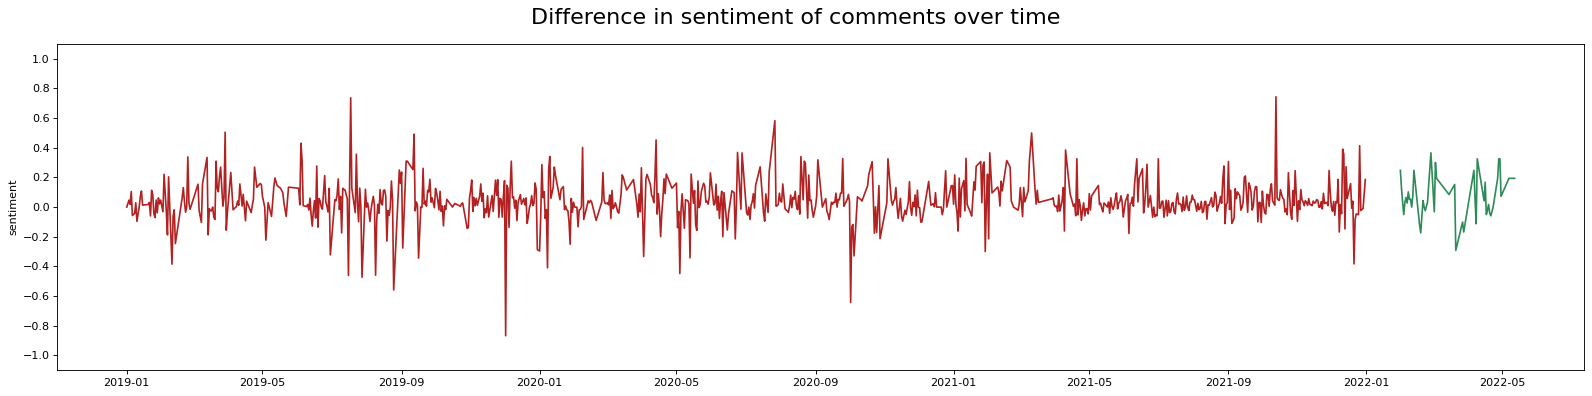

In [19]:
plt.figure(figsize=(20, 5), dpi=80)
plt.suptitle('Difference in sentiment of comments over time', fontsize=20)
axes = (before_df.groupby(before_df.index.date).pos.mean() - before_df.groupby(before_df.index.date).neg.mean()).plot(color='firebrick', ylim=(-1.1,1.1))
(after_df.groupby(after_df.index.date).pos.mean() - after_df.groupby(after_df.index.date).neg.mean()).plot(ax=axes, color='seagreen')
axes.yaxis.set_ticks(np.arange(-1.0, 1.1, 0.2))
axes.set_ylabel('sentiment')

plt.tight_layout()

### NLP Preprocessing

In [20]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [22]:
sentiment_df.comment_body = sentiment_df.comment_body.apply(remove_stopwords).apply(lemmatize_text).apply(clean_text)
before_df.comment_body = before_df.comment_body.apply(remove_stopwords).apply(lemmatize_text).apply(clean_text)
after_df.comment_body = after_df.comment_body.apply(remove_stopwords).apply(lemmatize_text).apply(clean_text)

KeyboardInterrupt: 

## WordCloud

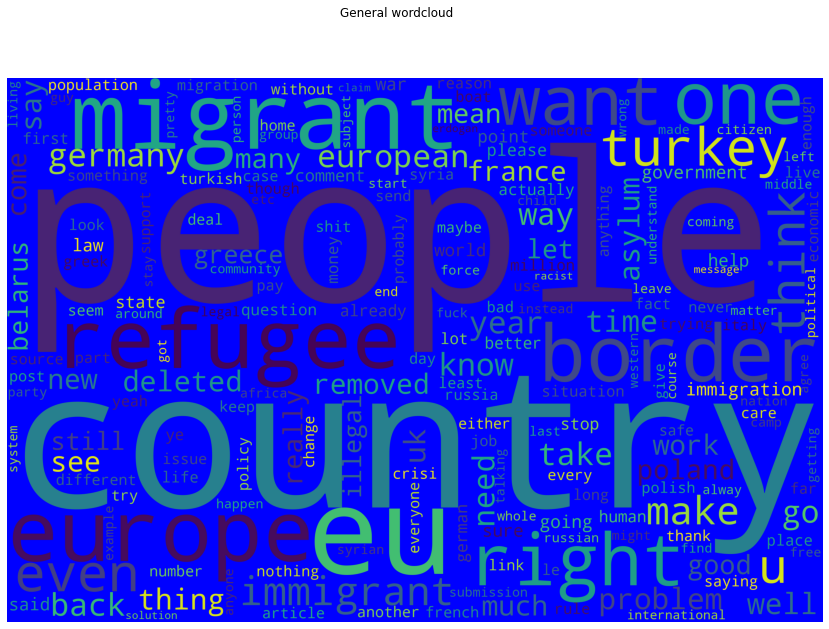

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(sentiment_df.comment_body.to_list()))
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.suptitle("General wordcloud")
# Display image
plt.imshow(wordcloud)

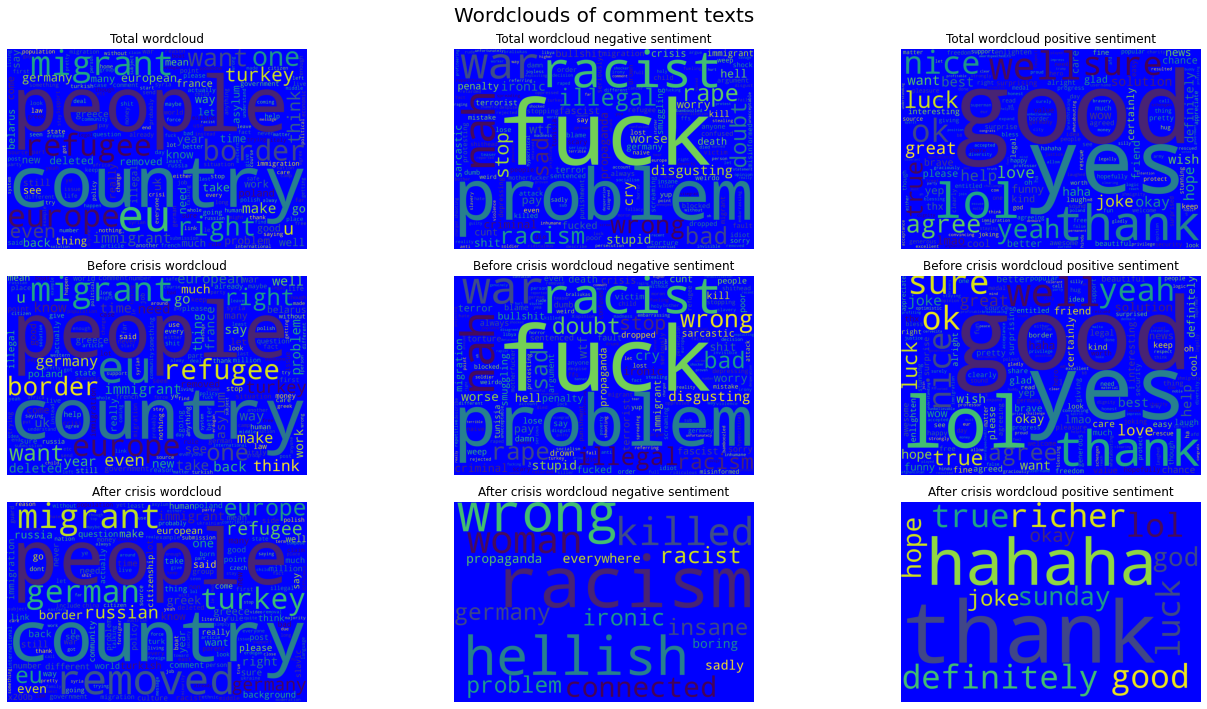

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(20,10)) #, constrained_layout=True)
fig.suptitle('Wordclouds of comment texts', size=20)
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(sentiment_df.comment_body.to_list()))
axs[0,0].imshow(wordcloud1)
axs[0,0].title.set_text('Total wordcloud')
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(sentiment_df[sentiment_df.neg > 0.8].comment_body.to_list()))
axs[0,1].imshow(wordcloud2)
axs[0,1].title.set_text('Total wordcloud negative sentiment')
wordcloud3 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(sentiment_df[sentiment_df.pos > 0.8].comment_body.to_list()))
axs[0,2].imshow(wordcloud3)
axs[0,2].title.set_text('Total wordcloud positive sentiment')

wordcloud4 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(before_df.comment_body.to_list()))
axs[1,0].imshow(wordcloud4)
axs[1,0].title.set_text('Before crisis wordcloud')
wordcloud5 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(before_df[before_df.neg > 0.8].comment_body.to_list()))
axs[1,1].imshow(wordcloud5)
axs[1,1].title.set_text('Before crisis wordcloud negative sentiment')
wordcloud6 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(before_df[before_df.pos > 0.8].comment_body.to_list()))
axs[1,2].imshow(wordcloud6)
axs[1,2].title.set_text('Before crisis wordcloud positive sentiment')

wordcloud7 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(after_df.comment_body.to_list()))
axs[2,0].imshow(wordcloud7)
axs[2,0].title.set_text('After crisis wordcloud')
wordcloud8 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(after_df[after_df.neg > 0.8].comment_body.to_list()))
axs[2,1].imshow(wordcloud8)
axs[2,1].title.set_text('After crisis wordcloud negative sentiment')
wordcloud9 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False).generate(' '.join(after_df[after_df.pos > 0.8].comment_body.to_list()))
axs[2,2].imshow(wordcloud9)
axs[2,2].title.set_text('After crisis wordcloud positive sentiment')

for axrow in axs:
    for ax in axrow:
        ax.axis('off')


# plt.subplots_adjust(left=0,
#                     bottom=0, 
#                     right=0.01, 
#                     top=0.01, 
#                     wspace=0, 
#                     hspace=0)
plt.tight_layout()
plt.show()